# Project notebook **<span style="COLOR:RED"></span>**


### Student 1
Name : Sebastien Moeller
<br>Group : advanced
### Student 2
Name : Viktor Malesevic
<br>Group : advanced
### Data name : 
* Poloniex Exchange data
* Google Trends
### Data URL : 
### Short summary of the project and datasource :
<span style="COLOR:RED">Linking social media trends to the prices of cryptocurrencies.</span>

# General instructions (this cell might be deleted for submission)
** <span style="color:red"> Write all the project in this file : code and explanations and upload it before January 7th at 23:55 </span> ** : 

<span style="color:red">Remember : Code cells must be smaller than 30 lines </span>

Every thing must be in the notebook :

* Explanation of what you want to do with data should be present in the Notebook
* Download data in the notebook (check the URL availability) and give the source of data (both URL and textual description)
* Give as much as possible characteristics of data (size, type, fields, ...)
* Provide visualisation of the data that you think useful
* Check for the consistence of the dataset (error, missing data,...) and correct and/or delete errors
* **Ask yourself a question that request you to perform an estimation** (for example, you can choose a data depending on time, and try to predict the latest 10% of data knowing the rest of data). **This will typically be solved through the proposal of a model and fitting the parameters of the model to (part of) the data.**

If you end up writing long chunks of code, make sure you split it in logical «smaller code cells» and explain the logic. The Juptyer Notebook will be **both the memoire** you will submit for evaluation **and the visual support** for your oral presentation of your project, keep this in mind while writing it.

### Aims : 
** <span style="color:red"> Here explain what you what to do with data</span> ** 
* 
* 
* 

### Download : 

Importing Cryptocurrency

## Step 0. Import the dataset

As the dataset grew and the computation time to generate it increased we needed to export and import the data set to save time between sessions.

In [12]:
import sys
import os
import pandas as pd

In [20]:
file = os.path.realpath(os.path.join(os.getcwd(), os.path.dirname('data.csv')))
file_name = 'data'
# Mac
data = pd.read_csv(file+'/'+file_name+'.csv')
# Windows
#data = pd.read_csv(file+'\\'+file_name+'.csv')

The code to save the dataset

In [ ]:
file = os.path.realpath(os.path.join(os.getcwd(), os.path.dirname('data.csv')))
file_name = 'data'
# Mac
#data.to_csv('file+'/'+file_name+'.csv')
# Windows
#data.to_csv('file+'\\'+file_name+'.csv')

How did we generate the data?

## Step 1. Importing from Poloniex
Poloniex is a cryptocurrency exchange found on https://poloniex.com/exchange, to download the data we use a package made by a poloniex community member.

Importing from API

* To import poloniex we need to install the package in the console using:

`pip install poloniex`
* The help function gives a list of functions included in the package and some descriptions

`help(poloniex.poloniex)`
* We are using the public data so no keys are needed

The packages has many functionalities but the information we want is public, therefore we do not need an access tokens or secret keys. The currency we are looking for is BitCoin relative to the USD, therefore looking at the documentation we know that we need to search using the term `'USDT_BTC'`, with an additional parameter of seconds between measurment. We chose to take the highest frequency of 5 minutes, but also of 24 hours.

In [22]:
import poloniex
polo = poloniex.Poloniex()
btc300 = pd.DataFrame(polo.returnChartData("USDT_BTC", 300))
btc86400 = pd.DataFrame(polo.returnChartData("USDT_BTC", 86400))

Let us see the first date and the last date of this data. As the data is saved as a Unix time stamp, we need to convert it using the datetime package into a familiar form.

In [ ]:
import datetime
print("Start date 5 minute")
print(datetime.datetime.fromtimestamp(btc300["date"][0]))
print("End date 5 minute")
print(datetime.datetime.fromtimestamp(btc300["date"][len(btc300)-1]))


print("Start date daily")
print(datetime.datetime.fromtimestamp(btc86400["date"][0]))
print("End date daily")
print(datetime.datetime.fromtimestamp(btc86400["date"][len(btc86400)-1]))

We chose to convert all dates into a recognizable format

In [ ]:
Convert datetime from timestamp to a recognizable format
for i in range(len(btc86400)):
   btc86400["date"][i] = datetime.datetime.fromtimestamp(btc86400["date"][i])

## Step 2. Importing Google Trends

In [35]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ["Blockchain", "BTC", "BitCoin"]
pytrends.build_payload(kw_list)

trends = pytrends.interest_over_time()

We notice in the trends that they are all proportional to oneanother, as the max is 100, the accuracy of blockchain is lost as it only ever became 5% as popular as BitCoin in their respective peaks. Therefore we decided to import each individually and then combine them into one data frame.

This is a function to retrieve trends with maximum available accuracy from Google, of a list of terms to look up, concatenated into one matrix containing a date column

In [49]:
trends[-10:]

,date,Blockchain,BTC,BitCoin
250,2017-11-05,51,35,29
251,2017-11-12,51,37,31
252,2017-11-19,52,34,28
253,2017-11-26,70,65,66
254,2017-12-03,87,87,93
255,2017-12-10,91,82,86
256,2017-12-17,100,100,100
257,2017-12-24,71,74,63
258,2017-12-31,75,70,48
259,2018-01-07,92,65,47


In [42]:
def payload(strings):
    pytrends = TrendReq(hl='en-US', tz=360)
    
    trend = []
    
    for i in range(len(strings)):
        pytrends.build_payload([strings[i]])
        trend.append(pytrends.interest_over_time().drop('isPartial', axis = 1))
    
    trend = pd.concat(trend, axis = 1)
    trend.reset_index(inplace = True)
    return trend

In [43]:
terms = ('Blockchain', 'BTC', 'BitCoin')
trends = payload(terms)

** <span style="color:red">If there is any obvious data curation to be performed upon initial data loading, do it here</span> ** 



To perform computations on the data set we want to calculate a few more variables and add them to the same data frame

In [44]:
data = btc86400
data['tBitCoin'] = btc86400['close']
data['tBTC'] = btc86400['close']
data['tBlockchain'] = btc86400['close']

day = datetime.datetime.now().day
data = data[:-day]
#%% Trends are weekly so they are repeated 7 times in the daily data
for i in range(4, len(data)+4):
    data['tBitCoin'][i-4] = trends['BitCoin'][int(109+(i/7))]
    data['tBTC'][i-4] = trends['BTC'][int(109+(i/7))]
    data['tBlockchain'][i-4] = trends['Blockchain'][int(109+(i/7))]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellAp

In [45]:
data['delta'] = data['open'] - data['close']

price = pd.DataFrame(btc86400["close"])
price['pct_change'] = price.close.pct_change()
price['log_return'] = np.log(price.close) - np.log(price.close.shift(1))
data['logReturn'] = price['log_return']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


NameError: name 'np' is not defined

This is where the dataset will be exported to avoid the computation time to get to this point.

### Data charaterisctics :  Here, give as much as possible characteristics of data
** <span style="color:red"> Write explanations here</span> ** 
* The data set is complete in that there are no missing values for their given date range.
* The cryptocurrencys have the following information:

`close, date, high, low, open, quoteVolume, volume`
* The main discrepancy is merging the data into one complete set is that the prices we chose to use are in 5-minute to 1-day intervals, while the Google Trends are weekly.

In [92]:
btc300.columns

Index(['close', 'date', 'high', 'low', 'open', 'quoteVolume', 'volume',
       'weightedAverage'],
      dtype='object')

In [47]:
btc300.describe()

,close,date,high,low,open,quoteVolume,volume,weightedAverage
count,305188.000000,3.051880e+05,305188.000000,305188.000000,305188.000000,305188.000000,3.051880e+05,305188.000000
mean,1820.834862,1.470151e+09,1825.243163,1816.145670,1820.873686,12.301258,5.105731e+04,1820.702676
std,3189.899236,2.643010e+07,3200.774534,3178.356629,3190.121604,33.119972,1.700453e+05,3189.639099
min,99.000000,1.424373e+09,0.330000,99.000000,0.330000,0.000000,0.000000e+00,0.000000
25%,331.830579,1.447262e+09,331.900000,331.362024,331.500000,0.000000,0.000000e+00,331.469667
50%,611.621380,1.470151e+09,612.000000,611.000000,611.612863,0.171882,1.004471e+02,611.597159
75%,1348.624750,1.493040e+09,1349.999850,1347.150000,1348.700000,10.359461,2.393522e+04,1348.623708
max,19896.687300,1.515929e+09,19903.440214,19860.120000,19896.687300,1244.437950,8.905612e+06,19888.009976


In [94]:
btc300.dtypes

close              float64
date                 int64
high               float64
low                float64
open               float64
quoteVolume        float64
volume             float64
weightedAverage    float64
dtype: object

In [95]:
btc300.shape

(305188, 8)

In [50]:
trends.columns

Index(['date', 'Blockchain', 'BTC', 'BitCoin'], dtype='object')

In [51]:
trends.describe()

,Blockchain,BTC,BitCoin
count,260.000000,260.000000,260.000000
mean,10.430769,10.346154,6.465385
std,16.120175,13.155566,12.464109
min,0.000000,2.000000,1.000000
25%,2.000000,5.000000,2.000000
50%,3.000000,6.000000,3.000000
75%,12.000000,10.000000,5.000000
max,100.000000,100.000000,100.000000


In [97]:
trends.dtypes

date          datetime64[ns]
Blockchain             int64
BTC                    int64
BitCoin                int64
dtype: object

In [99]:
trends.shape

(260, 4)

In [53]:
trends[-10:]

,date,Blockchain,BTC,BitCoin
250,2017-11-05,51,35,29
251,2017-11-12,51,37,31
252,2017-11-19,52,34,28
253,2017-11-26,70,65,66
254,2017-12-03,87,87,93
255,2017-12-10,91,82,86
256,2017-12-17,100,100,100
257,2017-12-24,71,74,63
258,2017-12-31,75,70,48
259,2018-01-07,92,65,47


### Data visualisation and representation
** <span style="color:red"> Write explanations here</span> ** 
* As we are plotting several different data sets we chose to write a function to generate a plot of the whole range with a subplot of the most recent observations up to a certain factor. We plotted the last 30 days in the subplots.

In [110]:
import matplotlib.pyplot as plt

def multiPlot(data, x, y, factor):
    fig = plt.figure()
    
    axes1 = fig.add_axes([0.05, 0.2, 1.2, 0.8]) # main axes
    axes2 = fig.add_axes([0.2, 0.5, 0.6, 0.3]) # inset axes

    # main figure
    for i in range(len(y)):
        axes1.plot(data[x], data[y[i]]/data[y[i]].max())

    axes1.legend(loc=2)
    axes1.set_xlabel(x)
    axes1.set_ylabel('Max')

    # insert
    for i in range(len(y)):
        axes2.plot(data[x][-30*factor:], data[y[i]][-30*factor:]/data[y[i]][-30*factor:].max())

    axes2.set_xlabel(x)
    axes2.set_ylabel('Max');
    plt.show()

## Poloniex data

#### View data at 5 minute intervals

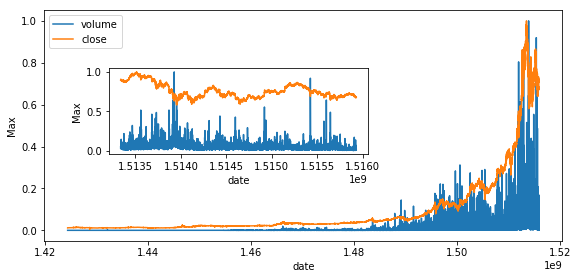

In [111]:
multiPlot(btc300, 'date', ('volume','close'), 12*24)

#### View data at daily intervals

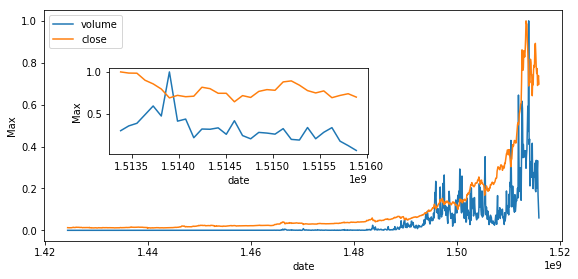

In [112]:
# View Data daily
multiPlot(btc86400, 'date', ('volume','close'), 1)

#### Lets look at the last 30 days since new years as japanese candle sticks using a package

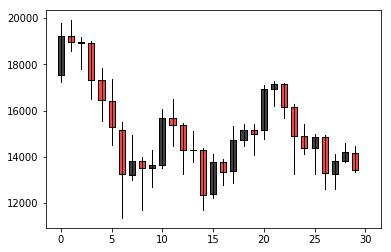

In [119]:
from matplotlib.finance import candlestick2_ohlc
fig, ax = plt.subplots()
candlestick2_ohlc(ax,btc86400['open'][-30:],btc86400['high'][-30:],btc86400['low'][-30:],btc86400['close'][-30:],width=0.6)
fig

## Google Trends data

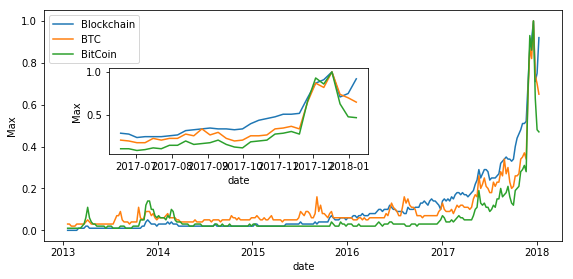

In [121]:
multiPlot(trends, 'date', terms, 1)

In [87]:
terms

('Blockchain', 'BTC', 'BitCoin')

### Data consistency checking
** <span style="color:red"> Write explanations here</span> ** 
* As said and solved above, we weekly trends needed to be matched to the daily price data we chose to follow.
* The data set contains no missing values
* As the trends are weekly, the most recent days will rarely have a trend as they are still being calculated for the current week. Therefore we chose to use the data from the start of pooniex exchange prices to the end of 2017.

### Estimation question
** <span style="color:red"> Write explanations here</span> ** 
* 
* 
* 

In [ ]:
### write code here (use as many cells as needed)



### As many other optional questions as you want
** <span style="color:red"> Write explanations here</span> ** 
* 
* 
* 